# Import Libraries

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import plotly.express as px
from fbprophet import Prophet

In [2]:
# initilize plotly
import plotly.io as pio
pio.renderers.default='colab'

# Import Dataset and Explore it

In [4]:
# dataframes creation for both training and testing datasets 
df=pd.read_csv('/content/TSLA.csv')

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,287.000000,309.588013,282.600006,307.920013,307.920013,80243500
1,2020-07-28,300.799988,312.940002,294.884003,295.298004,295.298004,79043500
2,2020-07-29,300.200012,306.962006,297.399994,299.821991,299.821991,47134500
3,2020-07-30,297.600006,302.648010,294.200012,297.497986,297.497986,38105000
4,2020-07-31,303.000000,303.410004,284.196014,286.152008,286.152008,61041000
...,...,...,...,...,...,...,...
248,2021-07-21,659.609985,664.859985,650.289978,655.289978,655.289978,13953300
249,2021-07-22,656.440002,662.169983,644.599976,649.260010,649.260010,15105700
250,2021-07-23,646.359985,648.799988,637.299988,643.380005,643.380005,14581300
251,2021-07-26,650.969971,668.200012,647.109985,657.619995,657.619995,25044100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,590.001099,603.131873,575.144095,590.103731,590.103731,4.258469e+07
std,154.433015,156.077155,151.697989,153.968097,153.968097,2.618106e+07
min,279.200012,284.000000,273.000000,274.877991,274.877991,1.395330e+07
25%,438.440002,447.000000,424.510010,434.000000,434.000000,2.539140e+07
50%,620.130005,632.500000,603.049988,623.309998,623.309998,3.382360e+07
75%,687.000000,700.700012,670.320007,684.900024,684.900024,4.964990e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express - Visualizing the historical performance of Tesla

In [8]:
px.area(df,x='Date',y='Close')

In [9]:
px.line(df,x='Date',y='Close')

In [10]:
px.area(df,x='Date',y='Volume')

In [11]:
px.bar(df,x='Date',y='Volume')

In [13]:
px.box(df,y='Close')

# Data Preparation

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,287.000000,309.588013,282.600006,307.920013,307.920013,80243500
1,2020-07-28,300.799988,312.940002,294.884003,295.298004,295.298004,79043500
2,2020-07-29,300.200012,306.962006,297.399994,299.821991,299.821991,47134500
3,2020-07-30,297.600006,302.648010,294.200012,297.497986,297.497986,38105000
4,2020-07-31,303.000000,303.410004,284.196014,286.152008,286.152008,61041000
...,...,...,...,...,...,...,...
248,2021-07-21,659.609985,664.859985,650.289978,655.289978,655.289978,13953300
249,2021-07-22,656.440002,662.169983,644.599976,649.260010,649.260010,15105700
250,2021-07-23,646.359985,648.799988,637.299988,643.380005,643.380005,14581300
251,2021-07-26,650.969971,668.200012,647.109985,657.619995,657.619995,25044100


In [17]:
columns=['Date','Close']
ndf=pd.DataFrame(df,columns=columns)

In [18]:
ndf

,Date,Close
0,2020-07-27,307.920013
1,2020-07-28,295.298004
2,2020-07-29,299.821991
3,2020-07-30,297.497986
4,2020-07-31,286.152008
...,...,...
248,2021-07-21,655.289978
249,2021-07-22,649.260010
250,2021-07-23,643.380005
251,2021-07-26,657.619995


In [20]:
prophet_df= ndf.rename(columns={'Date':'ds','Close':'y'})

In [21]:
prophet_df

,ds,y
0,2020-07-27,307.920013
1,2020-07-28,295.298004
2,2020-07-29,299.821991
3,2020-07-30,297.497986
4,2020-07-31,286.152008
...,...,...
248,2021-07-21,655.289978
249,2021-07-22,649.260010
250,2021-07-23,643.380005
251,2021-07-26,657.619995


# Create Facebook Prophet Model


In [22]:
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecasting

In [23]:
# Forcasting into the future
future=m.make_future_dataframe(periods = 30)
forecast=m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-27,309.541063,247.804901,377.950123,309.541063,309.541063,-0.927277,-0.927277,-0.927277,-0.927277,-0.927277,-0.927277,0.0,0.0,0.0,308.613786
1,2020-07-28,311.193408,250.206328,378.626961,311.193408,311.193408,2.136302,2.136302,2.136302,2.136302,2.136302,2.136302,0.0,0.0,0.0,313.329710
2,2020-07-29,312.845752,245.818123,376.005598,312.845752,312.845752,0.362333,0.362333,0.362333,0.362333,0.362333,0.362333,0.0,0.0,0.0,313.208086
3,2020-07-30,314.498097,250.208472,377.615735,314.498097,314.498097,0.402659,0.402659,0.402659,0.402659,0.402659,0.402659,0.0,0.0,0.0,314.900756
4,2020-07-31,316.150442,248.967964,384.193314,316.150442,316.150442,1.159075,1.159075,1.159075,1.159075,1.159075,1.159075,0.0,0.0,0.0,317.309516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2021-08-22,622.539051,555.709771,689.384184,612.058411,632.900859,-1.566546,-1.566546,-1.566546,-1.566546,-1.566546,-1.566546,0.0,0.0,0.0,620.972505
279,2021-08-23,622.321450,550.659528,686.033023,611.218793,633.473870,-0.927277,-0.927277,-0.927277,-0.927277,-0.927277,-0.927277,0.0,0.0,0.0,621.394172
280,2021-08-24,622.103848,557.632630,687.581167,610.118118,633.804600,2.136302,2.136302,2.136302,2.136302,2.136302,2.136302,0.0,0.0,0.0,624.240150
281,2021-08-25,621.886247,555.568734,691.510882,609.129340,634.367460,0.362333,0.362333,0.362333,0.362333,0.362333,0.362333,0.0,0.0,0.0,622.248580


In [25]:
px.line(forecast,x='ds',y='yhat')

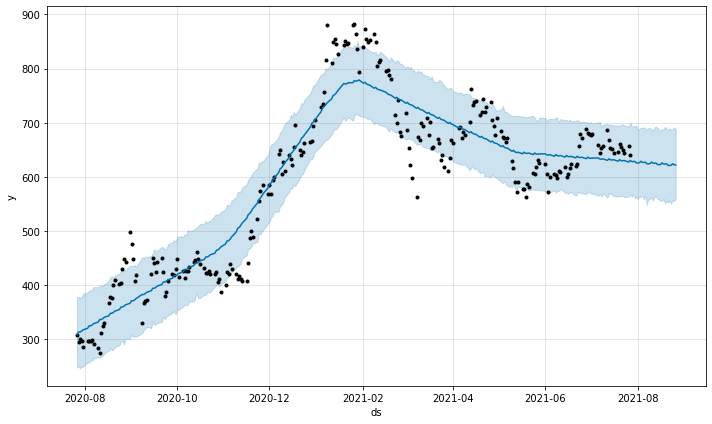

In [26]:
figure = m.plot(forecast, xlabel= 'ds', ylabel='y')

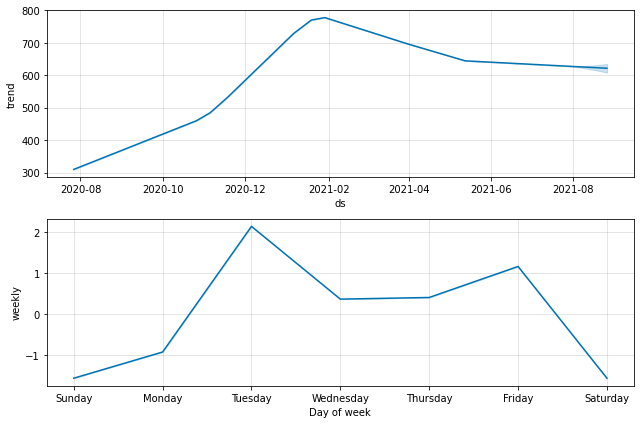

In [27]:
figure2= m.plot_components(forecast)

# Downloading Forecast File

In [28]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Thank You
***Amrita Gautam***